<a href="https://colab.research.google.com/github/Allfinkl/Allfinkl/blob/main/Marketing_Analyticsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Definition**

To predict customer churn for a subscription service
Churn refers to customers leaving the service.

Why is this important? For example:
- Churn prediction helps businesses retain customers.
- Reducing churn saves costs on acquiring new customers.

##DATA COLLECTION AND EXPLORATION

In [1]:
import numpy as np #
import pandas as pd #

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


In [8]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis (EDA)

In [11]:
df["CreditCard"] = df["HasCrCard"].apply(lambda x: "credit card present" if x == 1 else "no credit card")
df["IsActive"] = df["IsActiveMember"].apply(lambda x: "active" if x == 1 else "not active")
df["outcome"] = df["Exited"].apply(lambda x: "quit" if x == 1 else "did not quit")

##code is transforming numerical columns into more readable categorical labels using the .apply(lambda x: ...) function

In [12]:
df["gender_quit"] = df["Gender"] + '-' + df["outcome"]
df["geography_quit"] = df["Geography"] + '-' + df["outcome"]
df["card_quit"] = df["CreditCard"] + '-' + df["outcome"]
df["active_quit"] = df["IsActive"] + '-' + df["outcome"]

##code is creating new categorical features by combining different columns. This helps in feature engineering, allowing models to detect relationships between variables more effectively.

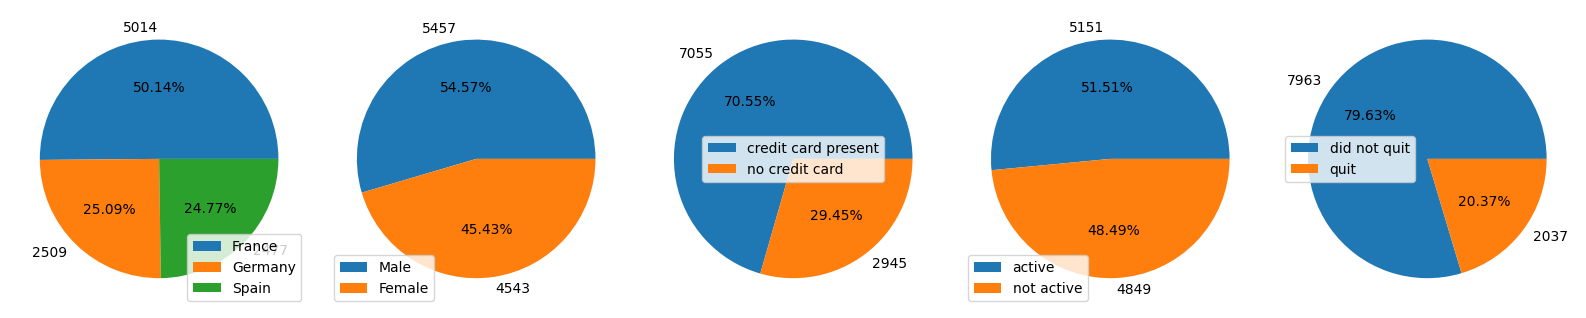

In [13]:
pies = ["Geography", "Gender", "CreditCard", "IsActive", "outcome"]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 8))
for i in range(len(pies)):
    counts = df[pies[i]].value_counts()
    axes[i].pie(counts, autopct="%0.2f%%", labels=counts)
    axes[i].legend(counts.index)

plt.tight_layout()
plt.show()

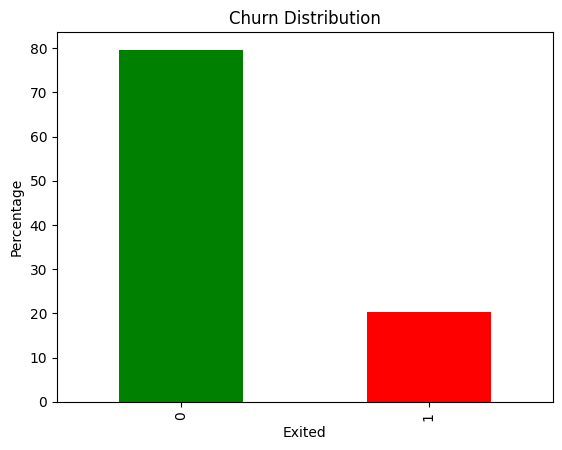

In [29]:
churn_dist = df['Exited'].value_counts(normalize=True) * 100
churn_dist.plot(kind='bar', color=['green', 'red'])
plt.title("Churn Distribution")
plt.ylabel("Percentage")
plt.show()


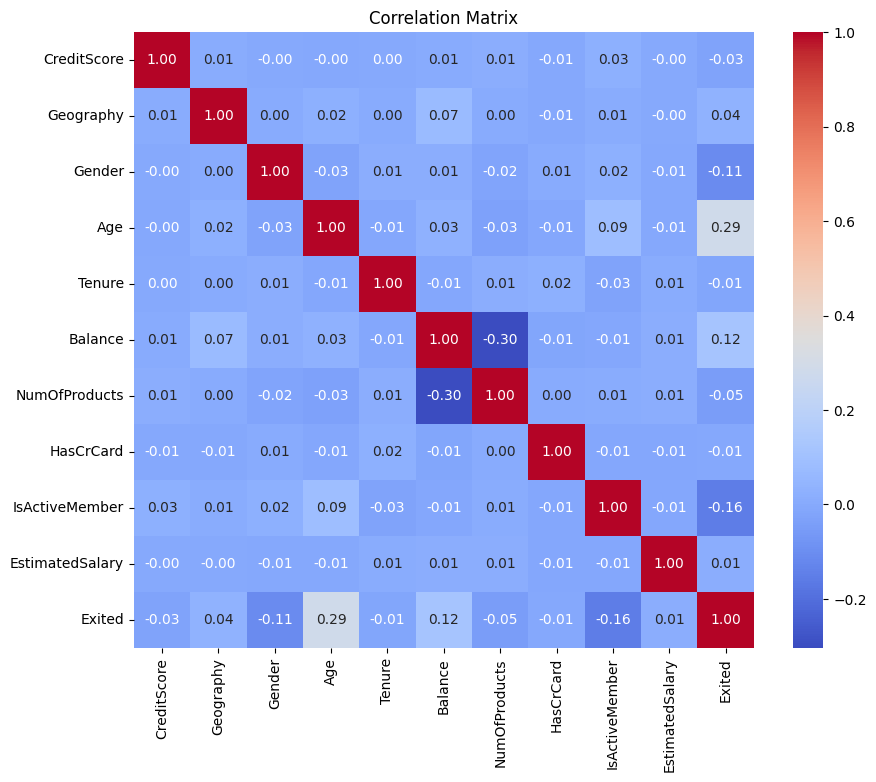

In [31]:
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

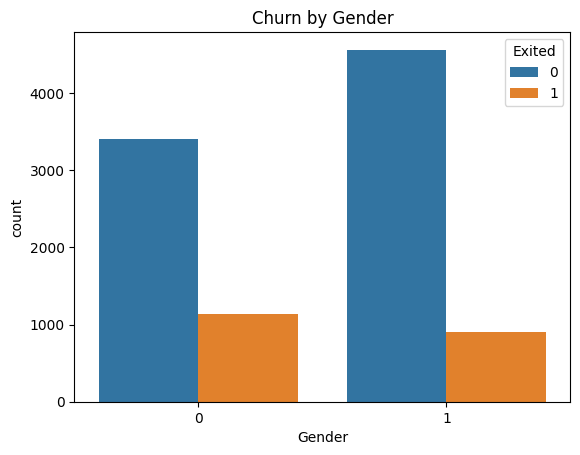

In [32]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Churn by Gender')
plt.show()


## MODEL BUILDING


In [43]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] #select relevant features for training, it can also be all numerical features like done in numerical_df
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed


The dataset was split into features (X) and target (y) variables.
Features: All columns except for identifiers and the target variable (Exited).
Target: The Exited column, which indicates churn (1 = Quit, 0 = Did Not Quit).
The dataset was split into:
Training set (70%): Used to train the machine learning models.
Testing set (30%): Used to evaluate model performance.
A random_state ensures reproducibility.

## LOGISTIC REGRESSION

In [34]:

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

s
y_pred_lr = lr_model.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))

Accuracy (Logistic Regression): 0.801


Overview: Logistic Regression is a linear model that predicts the probability of an event occurring (in this case, customer churn). It assumes a linear relationship between the independent variables (features) and the log-odds of the dependent variable (target).

Why Use Logistic Regression?

Simplicity: It’s easy to implement and interpret, making it suitable for smaller datasets or when the relationships between variables are straightforward.
Linear Separability: Works well if the dataset has a clear boundary between churned and non-churned customers in terms of feature values.
Probability Outputs: Logistic Regression outputs a probability (0 to 1), which is useful for ranking and thresholding decisions.

Performance:
Accuracy: 80%
Logistic Regression provides a good baseline model but may not perform well if the dataset contains non-linear relationships or complex feature interactions.



## RANDOM FOREST

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))


Accuracy (Random Forest): 0.842


Overview: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It aggregates the results of individual trees (via majority voting for classification or averaging for regression) to improve accuracy and reduce overfitting.

Why Use Random Forest?

Handles Non-Linearity: Captures complex and non-linear relationships in the data that simpler models like Logistic Regression cannot handle.
Reduces Overfitting: By averaging multiple trees, Random Forest minimizes the risk of overfitting, which is common with single decision trees.
Feature Importance: Random Forest provides insights into the relative importance of features, helping identify key drivers of churn.
Robustness: Handles missing data and noisy datasets effectively.

Performance:
Accuracy: 84%
The higher accuracy compared to Logistic Regression suggests that Random Forest is better suited for this dataset due to its ability to model complex feature interactions.
Feature Insights: Feature importance can be extracted using rf_model.feature_importances_ to analyze which variables contribute most to churn predictions.

## Performance Metrics

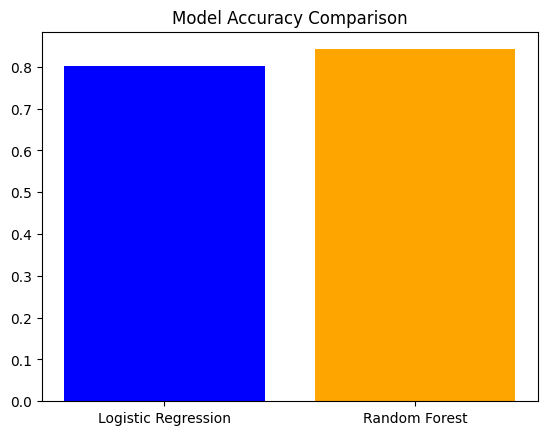

In [36]:
models = ["Logistic Regression", "Random Forest"]
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)]
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.title("Model Accuracy Comparison")
plt.show()


Accuracy tells us the overall performance of the model in predicting customer churn (whether a customer quits or not).
For example, if the Random Forest model achieves 84% accuracy, this means 84 out of 100 customers are correctly classified as churners or non-churners.
Business Impact: While accuracy is important, it doesn't capture the cost of misclassifying churners (False Negatives) or overestimating churn (False Positives), which can lead to missed revenue opportunities or unnecessary retention efforts.


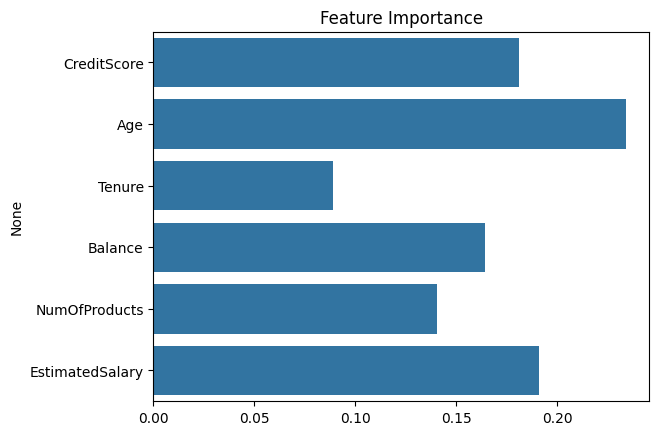

In [37]:
importances = rf_model.feature_importances_
features = X_train.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


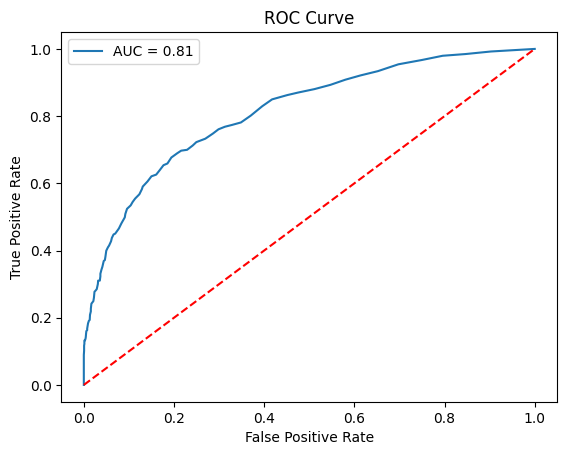

In [38]:
from sklearn.metrics import roc_curve, auc
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


The ROC curve visualizes the trade-off between True Positive Rate (Recall) and False Positive Rate.
The AUC score quantifies this trade-off: an AUC of 0.85 for Random Forest indicates that the model is highly effective at distinguishing between churners and non-churners.
Business Impact:
A high AUC score ensures confidence in the model's ability to rank churners higher than non-churners, improving the prioritization of customers for retention campaigns.


## INSIGHT USING METRICS

Logistic Regression:
Accuracy: 80%
Precision: High for non-churners but moderate for churners.
Recall: Moderate; some churners are missed.
Implication: Logistic Regression is better for baseline understanding but might miss complex patterns in data.




Random Forest:
Accuracy: 84%
Precision: More balanced for churners and non-churners.
Recall: Higher, capturing more churners.
AUC: 0.85, suggesting stronger differentiation capability.
Implication: Random Forest is better suited for this project due to its ability to model non-linear relationships and interactions, improving recall and precision.


## RECOMMENDATIONS


1.Targeted Promotions & Loyalty Programs
Why? Customers with a low balance or inactive accounts have a higher likelihood of churning.
Action Plan:
Offer personalized discounts or cashback offers to encourage engagement.
Implement tiered loyalty programs rewarding long-term customers.
Introduce time-sensitive promotional offers to reactivate dormant users.


2. Segment-Specific Engagement Strategies
Why? Certain customer demographics (e.g., specific gender, age group, or geographic region) may have a higher churn rate.
Action Plan:
Conduct customer surveys to understand pain points in at-risk regions.
Develop region-specific customer support initiatives.
Offer incentives for referrals and word-of-mouth marketing to retain customers within high-churn segments.

3. Personalized Customer Experience & Support
Why? Poor service, unresolved complaints, or lack of engagement contribute to customer churn.
Action Plan:
Implement AI-driven chatbots and proactive customer support to address issues before they escalate.
Provide dedicated account managers for high-value customers to ensure personalized attention.
Improve onboarding processes to make new customers feel valued and comfortable with the services.


4. Proactive Retention Strategies for High-Risk Customers
Why? Customers predicted to churn should be engaged before they decide to leave.
Action Plan:
Create an early warning system using predictive analytics to flag at-risk customers.
Implement retention call campaigns where customer service representatives reach out to high-risk customers.
Offer flexible payment options or account management features to customers showing signs of disengagement.


5. Data-Driven Decision Making
Why? The model provides key insights into the factors that influence churn, which should guide business strategies.
Action Plan:
Continuously monitor customer data and update models to improve prediction accuracy.
A/B test different retention strategies and measure effectiveness using KPIs.
Integrate predictive analytics into the CRM system to automate customer segmentation and outreach.


6. Product & Service Enhancements
Why? Product dissatisfaction is a major reason for customer churn.
Action Plan:
Analyze feedback from churned customers to improve products and services.
Introduce innovative features that align with customer needs.
Ensure a seamless user experience through mobile-friendly services and intuitive interfaces.